In [1]:
import tensorflow as tf

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

import numpy as np



In [33]:
cat_directory_path = r"M:\Deep Learning\CNN\ImageData\dogs_vs_cats\dogs_vs_cats\train\cats"
dog_directory_path = r"M:\Deep Learning\CNN\ImageData\dogs_vs_cats\dogs_vs_cats\train\dogs"

In [34]:
print(len(os.listdir(cat_directory_path)))
print(len(os.listdir(dog_directory_path)))

10000
10000


### loading some of the images 
#### cv2 or numpy or PILImage


In [16]:
cat_image = r"M:\Deep Learning\CNN\ImageData\dogs_vs_cats\dogs_vs_cats\train\cats\cat.112.jpg"
import cv2
img = cv2.imread(cat_image)
img.shape

(374, 500, 3)

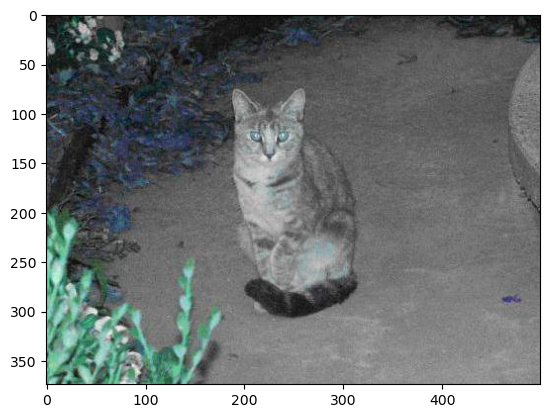

In [17]:
plt.imshow(img)

### Building Model

In [ ]:
base_dir = r"M:\Deep Learning\CNN\ImageData\dogs_vs_cats\dogs_vs_cats\train"


<p>loading images at a time is not convienint, coz of memory so we use Batches:
10 random dog images, 10 random cat images

mix both of them --> 20 images


load these 20 images and train  the data. Free these 20 images and loaad next batch of 20 images.</p>

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) #read docoment


#### creating batches

In [35]:
# using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    subset='training'
)

Found 16000 images belonging to 2 classes.


In [ ]:
# using 20% of data for validation
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150), #resize the images to 150x150
    batch_size=20,
    class_mode='binary',
    subset='validation',
    shuffle=False # disable shuffling for validate data
)

Found 4000 images belonging to 2 classes.


In [40]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
model = models.Sequential()

#layer 1
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

#layer2
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

# layer3
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

# layer4
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

<h3>Layer 1:</h3>
<p>
<ul>
<li>input shape = 150 x 150 x 3</li>
<li> num of filters = 32
<li> filter size = 3x3x3 </li>
<li> o/p = n-k+1 = 150-3+1 = None, 148, 148, 32 i.e. kernels </li>
None-> [we decided batches of 20, but don't know how many images we load before training]

parameter :

$$(3*3*3 + 1) *32 = 896$$

</ul>
</p>

<h3>Layer 2:</h3>
<p>
<ul>
<li>input shape = 74 x 74 x 32</li>
<li> num of filters = 64
<li> filter size = 3x3x32 </li>
<li> o/p = n-k+1 = 74-3+1 = None, 72, 72, 64 i.e. kernels </li>

parameter :

$$(3*3*32 + 1) *64 = 18496$$

</ul>
</p>




<h3>Layer 3:</h3>
<p>
<ul>
<li>input shape = 36, 36, 64</li>
<li> num of filters = 128
<li> filter size = 3x3x64 </li>
<li> o/p = n-k+1 = 36-3+1 = None, 34, 34, 128 i.e. kernels </li>

parameter :

$$(3*3*64 + 1) *128 = 73856$$

</ul>
</p>


<h3>Layer 3:</h3>
<p>
<ul>
<li>input shape = 34, 34, 128</li>
<li> num of filters = 128
<li> filter size = 3x3x64 </li>
<li> o/p = n-k+1 = 34-3+1 = None, 32, 32, 128 i.e. kernels </li>

parameter :

$$(3*3*128 + 1) *128 = 147584$$

</ul>
</p>



<p>
<h4>Flatten:</h4>

$$7, 7, 128 = (7*77128) = 6272$$



<h4>MLP</h4>

$$ 6272*512+512 = 3211776 $$


$$ 512*1 + 1 = 513 $$

</p>

In [ ]:
# sigmoid - Binary Classification
# Softmax - multi class classification
# regression - mse/mae

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model.fit(train_generator, epochs=10, validation_data=validation_generator )

Epoch 1/10
AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'
800/800 ━━━━━━━━━━━━━━━━━━━━ 119s 145ms/step - accuracy: 0.5345 - loss: 0.6856 - val_accuracy: 0.6327 - val_loss: 0.6315
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 118s 148ms/step - accuracy: 0.6586 - loss: 0.6151 - val_accuracy: 0.7602 - val_loss: 0.5057
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 119s 148ms/step - accuracy: 0.7675 - loss: 0.4921 - val_accuracy: 0.7915 - val_loss: 0.4478
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 117s 146ms/step - accuracy: 0.8232 - loss: 0.3998 - val_accuracy: 0.8253 - val_loss: 0.3920
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 119s 149ms/step - accuracy: 0.8566 - loss: 0.3291 - val_accuracy: 0.8450 - val_loss: 0.3532
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 118s 147ms/step - accuracy: 0.8947 - loss: 0.2515 - val_accuracy: 0.8457 - val_loss: 0.3618
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 118s 148ms/step - accuracy: 0.9225 - loss: 0.1901 - val_accuracy: 0.8625 - val_loss: 0.3354
Epoch 8/10

In [ ]:
img = cv2.imread(r"M:\Deep Learning\CNN\ImageData\dogs_vs_cats\test\dogs\dog.28.jpg")
print(img.shape)


(432, 287, 3)


In [54]:
model.predict(img)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1_1/Cast:0", shape=(32, 287, 3), dtype=float32). Expected shape (None, 150, 150, 3), but input has incompatible shape (32, 287, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 287, 3), dtype=uint8)
  • training=False
  • mask=None